# Assignment 3

In [3]:
# Import librerie
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv # Versione 4.1.2

In [4]:
plt.rcParams['figure.figsize'] = [15, 5]

# Photo stitching

Implementare uno script di image stitching tra due immagini.

In [5]:
# Caricamento immagini
im1 = cv.imread('images/boat1.jpg',0)
im2 = cv.imread('images/boat3.jpg',0)

Immagini utilizzate:

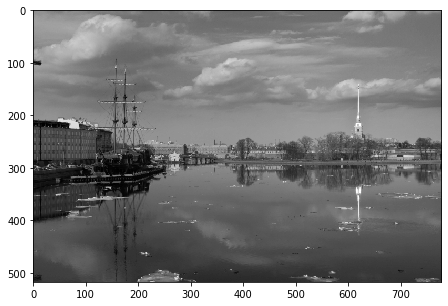

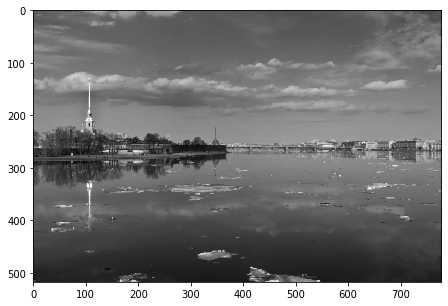

In [6]:
plt.imshow(im1, cmap = 'gray')
plt.show()
plt.imshow(im2, cmap = 'gray')
plt.show()

### 1. Trovare i match tra le due immagini

Calcolo dei keypoint (punti rappresentativi dell'immagine)

In [23]:
# Estrazione keypoint
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(im1, None)
(kps2, features2) = sift.detectAndCompute(im2, None)

Calcolo dei match dei i keypoint tra le due immagini utilizzate

In [ ]:
# Match features
bf = cv.BFMatcher(crossCheck=True)
matches = bf.match(features1, features2)

Vengono filtrati solo i primi 20 match

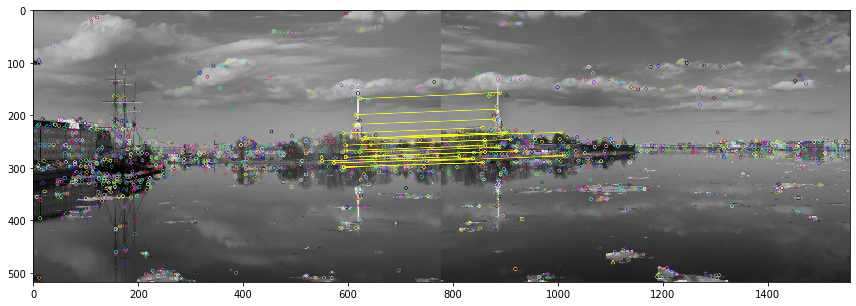

In [24]:
# Match filtrati
matches = sorted(matches, key=lambda x:x.distance)
result = cv.drawMatches(im1, kps1, im2, kps2, matches[0:20], None, matchColor=[255,255,0])
plt.imshow(result)
plt.show()

I match trovati rappresentano i punti per i quali le due immagini dovranno essere sovrapposte

### 2. Trovare l'omografia che descrive la trasformazione tra il <u>secondo</u> set di punti ed il <u>primo</u>

L'omografia è la relazione tra i punti delle due immagini tali per cui ogni punto della prima immagine corrisponde ad uno ed un solo punto della seconda.

In [25]:
def myHomography(kps1, kps2, matches):
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)
    for i, match in enumerate(matches):
        points1[i, :] = kps1[match.queryIdx].pt
        points2[i, :] = kps2[match.trainIdx].pt
    H, mask = cv.findHomography(points2, points1, cv.RANSAC)
    return H

In [26]:
H = myHomography(kps1, kps2, matches)

In [27]:
print(H)

[[ 5.70309615e-01 -7.49227601e-03  5.20668184e+02]
 [-1.52729586e-01  9.20766454e-01  2.95572968e+01]
 [-5.49987572e-04 -1.61803396e-05  1.00000000e+00]]


### 3. Applicare l'omografia alla seconda immagine

In [28]:
def myWrap(im1, im2, H):
    return cv.warpPerspective(im2, H, (im1.shape[1] + im2.shape[1], im1.shape[0]))

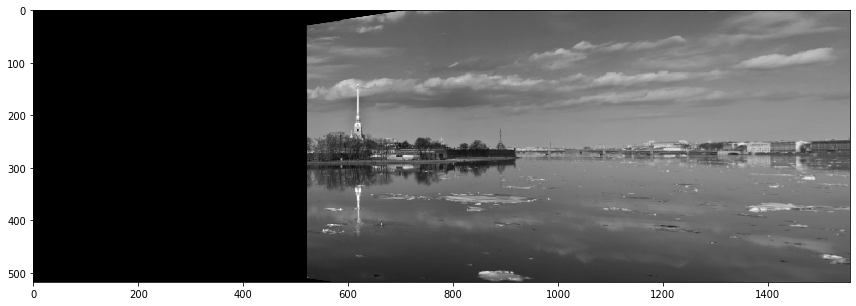

In [29]:
temp = myWrap(im1,im2, H)
plt.imshow(temp, cmap='gray')

### 4. Integrare la prima immagine

In [35]:
def myCollage(im_base, im_new):
    im_base[0:im_new.shape[0], 0:im_new.shape[1]] = im_new
    return im_base

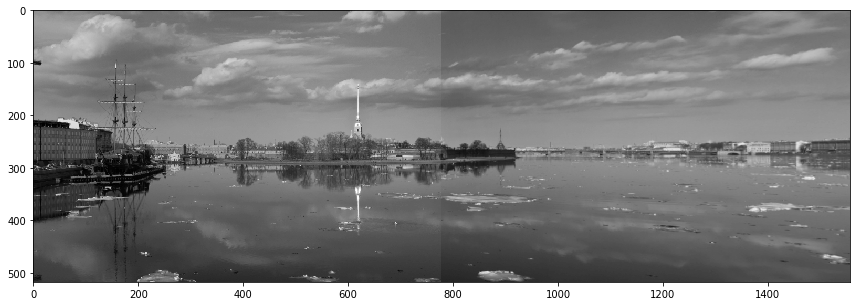

In [36]:
result = myCollage(temp, im1)
plt.imshow(result, cmap='gray'); plt.show()